<a href="https://colab.research.google.com/github/alongiladi/PythonClassClassificationExc/blob/main/lecture_05_11_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np



---



### Code Explanation

We set global parameters related to the size of font and labels used in a plot. The plt.rc() function is utilized here to configure the properties of various parts of the plot including the font size, axes labels size, legend font size and the tick labels size.

### Code

In [ ]:
# setting the default font size for all text in the plot to 14
plt.rc('font', size=14)

# setting the font size for labels and titles on the axes to 14
plt.rc('axes', labelsize=14, titlesize=14)

# adjusting the font size of the legend in the plot to 14
plt.rc('legend', fontsize=14)

# setting the size of tick labels on the x-axis to 10
plt.rc('xtick', labelsize=10)

# setting the size of tick labels on the y-axis to 10
plt.rc('ytick', labelsize=10)



---



# **Load the Data**

### MNIST Dataset Description

The MNIST ('Modified National Institute of Standards and Technology') is one of the most famous datasets in the field of machine learning, where each data point represents a 28x28 pixel grayscale image of a handwritten digit, 'mnist_784' is a version where each image is flattened into a 784-element array. Images are flattened to simplify the data structure, making it easier to feed into preliminary machine learning models. This dataset is commonly used for training and testing in the field of machine learning.



---


### Code Explanation

`from sklearn.datasets import fetch_openml`: This line is importing the function `fetch_openml` from the module `sklearn.datasets`. The `fetch_openml` function is responsible for fetching datasets from the OpenML website.


`mnist = fetch_openml('mnist_784', as_frame=False)`: This line is calling the `fetch_openml` function with two arguments. The first argument `mnist_784` signifies the name of the dataset to be downloaded. The second argument `as_frame=False` is a boolean indicating whether the data should be returned as pandas DataFrame and Series objects. Here, the data is not desired in pandas DataFrame format, thus the argument is set to False.

### Code

In [ ]:
# Import the "fetch_openml" function from the "datasets" module of the "sklearn" library.
from sklearn.datasets import fetch_openml

# Call the "fetch_openml" function to retrieve the MNIST dataset from OpenML by its name.
mnist = fetch_openml('mnist_784', as_frame=False)



---



### Code Explanation

The attribute `DESCR` of the variable "mnist" is accessed to print out a complete description of the MNIST dataset that was downloaded using the fetch_openml function from the sklearn library. The DESCR attribute is a string and it provides a detailed description of the specific dataset.

### Code

In [ ]:
# Use the DESCR keyword to print a detailed description of the MNIST dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b



---



# **Explore the Data**

### Code Explanation

Here we will return all keys of the 'mnist' object which is a `Dictionary-like` object. It includes keys-values of different properties of the MNIST dataset.

These keys usually include:
- `data`: This key corresponds to the actual dataset. In the case of the MNIST dataset, the 'data' key comprises of 70000 images, each being an array of length equal to 784 (28*28 pixels).

- `target`: This key corresponds to the labels or output for each of the instances in the dataset.

- `feature_names`: The names of the dataset columns.

- `DESCR`: Full description of the dataset.

- `details`: More detailed information about the dataset.

- `categorie``: If the dataset has categorical variables, this key would represent them.

### Code

In [ ]:
# call the keys() method on the 'mnist' object to get all the keys available in the dataset.
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])




---


### Code Explanation

The following code is splitting the MNIST dataset into features and labels. The features are assigned to the variable `X` and the labels are assigned to the variable `y`.

### Code

In [ ]:
# Assigning the data from mnist to X and the target labels to y.
X, y = mnist.data, mnist.target

# Print the data assigned to X
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




---


### Code Explanation

The `.shape` attribute is used to print the dimensions of the variable 'X', which is a numpy array containing the MNIST dataset.

### Code

In [ ]:
# Print the shape (dimensions) of the 'X' numpy array
print(X.shape)

(70000, 784)




---


### Code Explanation

Here, we simply prints the content of the variable `y`. `y` is a numpy array that contains the target labels of the MNIST dataset, which corresponds to the digits that each image represents.

### Code

In [ ]:
# Print the target labels (the actual digits that the images represent) stored in 'y'
print(y)
print(type(y))
print(y.shape)

['5' '0' '4' ... '4' '5' '6']
<class 'numpy.ndarray'>
(70000,)




---


### Code Explanation

The following function `plot_digit()` is used to plot and visualize an individual digit from the MNIST dataset. The function takes as an argument a single digit represented as an array of features (flattened 28x28 pixel grayscale values representing a single digit image). This array is reshaped back into a 28x28 matrix and plotted as an image.

### Code

In [ ]:
# This function definition starts a function named 'plot_digit' that takes in one parameter 'image_data'. This parameter is an array of length 784 containing the pixel values for an image.
def plot_digit(image_data):

    # 'image_data' is reshaped into a 28x28 grid. This makes sense because each image in the MNIST dataset is a 28x28 pixel image and was flattened out into a 784 length array.
    image = image_data.reshape(28, 28)

    # plt.imshow() function is used to display data as an image, i.e., on a 2D regular raster, where 'image' is the image data. 'cmap' stands for colormap and 'binary' is a type of colormap. It just means that the image will be displayed in grayscale.
    plt.imshow(image, cmap="binary")

    # plt.axis("off") is used to turn off the axis. This is used here to view the image in a better form without axis.
    plt.axis("off")



---


### Code Explanation

Here, we are selecting a specific digit (the first digit in this case, because of index [0]) from the MNIST dataset stored in the numpy array 'X'. The digit is saved in the variable 'some_digit'. Afterwards, the function 'plot_digit' is called with 'some_digit' as the argument to visualize the image of the digit. The `plt.show()` command is used to display the visualized digit image.

### Code

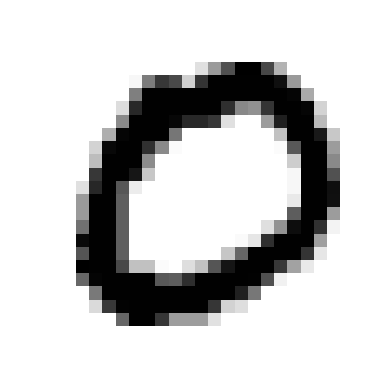

In [ ]:
# This line fetches the first image data (features pixel values) from the 'X' array and assigns it to the variable 'some_digit'.
# It is possible because each element in the 'X' array corresponds to one image from the MNIST dataset.
some_digit = X[6700]

# Here we use the previously defined function 'plot_digit' to plot (draw the image of) the digit defined by the 'some_digit' array.
# This function takes an array of pixel values, reshapes it to 28x28 and then creates an image plot in grayscale.
plot_digit(some_digit)

# This line calls 'plt.show()' function, which is necessary to display plots when running Python in script mode. This command actually opens the window with the plot and displays it.
plt.show()



---


### Code Explanation

This code prints the label of the first image from the MNIST dataset. The label `y[0]` is the true digit that the first image from the dataset `X` (corresponding with the same index) represents.

### Code

In [ ]:
# Print the label (the actual digit that the image represents) of the first image in the dataset
print(y[600])

9




---


### Code Explanation

The following code is used to visualize the first 100 images from the MNIST dataset. For this purpose, it creates a figure with given dimensions of 9x9 and iterates through the first 100 instances of feature data (`X`). For each digit, it uses the `plot_digit` function to display their images in a subplot of 10x10 grid. After plotting all the images, `plt.show()` displays the figure.

### Code

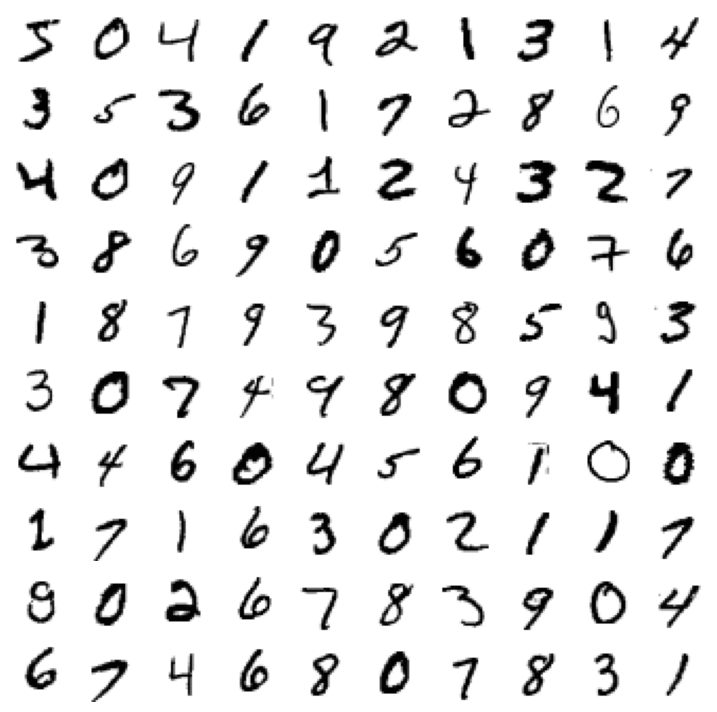

In [ ]:
# This line sets the size of the figure that you're about to plot. The size is specified by a tuple representing the width and height in inches.
plt.figure(figsize=(9, 9))

# This is a loop that goes through the first 100 images in the MNIST dataset.
# 'enumerate' provides the index (idx) along with the data of the image (image_data) for each loop cycle.
# 'X[:100]' means we're taking the first 100 images from the 'X' array.
for idx, image_data in enumerate(X[:100]):

    # This line creates a subplot in the figure. 10,10 sets a grid of 10x10 subplots. 'idx + 1' is the position of the subplot inside the 10x10 grid.
    plt.subplot(10, 10, idx+1)

    # For each image data, we're calling 'plot_digit' to draw that image in the subplot.
    plot_digit(image_data)

# This command opens up the window with the plot that contains subplots of the first 100 images.
plt.show()



---


# **Split the Data**

### Code Explanation

Here we split the MNIST dataset into training and testing sets. The first 60,000 instances of the dataset are used for training and the remaining 10,000 instances are used for testing. The split is done for both the features (X) and the labels (y). The shapes (dimensions) of the split datasets are then printed.

### Code

In [ ]:
"""
These commands split the 'X' and 'y' data into training and testing sets.
The first 60000 instances (out of 70000) are assigned to 'X_train' and 'y_train' and used for training the model.
The remaining 10000 instances are assigned to 'X_test' and 'y_test' and used to test the model.
"""
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# The 'print' commands output the shape (dimensions) of the corresponding numpy arrays. The 'f' before the strings in the print function allows to include variables in the strings by putting them into curly braces {}.
print(f'X_train: {X_train.shape}')  # prints the shape of X_train
print(f'y_train: {y_train.shape}')  # prints the shape of y_train
print(f'X_test: {X_test.shape}')  # prints the shape of X_test
print(f'y_test: {y_test.shape}')  # prints the shape of y_test

X_train: (60000, 784)
y_train: (60000,)
X_test: (10000, 784)
y_test: (10000,)




---


# **Training a Binary Classifier**

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable
of distinguishing between just two classes, 5 and non-5.

### Code Explanation

We are creating two boolean arrays `y_train_5` and `y_test_5` which represent whether each digit image in the training and testing set is '5' or not. For every instance in `y_train_5` and `y_test_5`, it checks if the label is equal to '5', if it is, it assigns `True`, otherwise `False`.

**NOTE:**
Thse boolean values are more intuitive and easier to understand while reading the code. When someone sees `True` or `False`, it's immediately clear that those variables represent some condition being met or not. It also improves code readability.

Also, sklearn, along with many other machine learning libraries, can handle boolean values (`True`/`False`) as well as integer values (1/0) as categories in the target data. Therefore, using `True`/`False` doesn't affect the technical implementation of the model.

### Code

In [ ]:
"""
These lines create new label sets, but instead of containing the number each image represents, they contain
either 'True' or 'False' depending on whether the image represents the number 5 or not.
This is achieved by the '==' comparison operation, which generates 'True' for every '5'
in the original 'y_train' or 'y_test' array and 'False' for any other number.
"""
y_train_5 = (y_train == '5')   # True for all 5s in training set, False for all other digits
y_test_5 =  (y_test == '5') # True for all 5s in testing set, False for all other digits



---


### Code Explanation

The two print statements in the Python code output the content of the arrays `y_train_5` and `y_test_5`. These arrays contain boolean values (`True`/`False`) indicating whether each corresponding image in the MNIST training and testing sets represents the digit `5`.

## Code

In [ ]:
# These commands print the content of 'y_train_5' and 'y_test_5'.
# 'y_train_5' and 'y_test_5' are boolean arrays that mark whether each corresponding image in the 'X_train' and 'X_test' arrays represents the digit '5'.
print(f'y_train_5: {y_train_5}')  # prints the content of y_train_5
print(f'y_test_5: {y_test_5}')    # prints the content of y_test_5

y_train_5: [ True False False ...  True False False]
y_test_5: [False False False ... False  True False]




---


### Code Explanation

The following code trains a binary classifier, specifically a Stochastic Gradient Descent (SGD) classifier, to predict if an image is `5` or `not 5`. The SGDClassifier package is imported from the Scikit-Learn's linear_model module. The model is then fit to the training data (X_train) and labels (y_train_5).

The Stochastic Gradient Descent (SGD) classifier is a linear classifier optimized by a stochastic approximation to gradient descent. It is efficient and easy to implement. Here's a detailed explanation:

1. "Linear Classifier":
Linear Classifier models, including SGD, aim to find the hyperplane which separates different classes in the feature space. The equation of this hyperplane uses the feature weights calculated during the model training. For binary classification, the model then uses these weights to predict which side of the hyperplane a specific input point lies on, and assigns it a class label accordingly.

2. "Stochastic Gradient Descent":
Gradient Descent is an optimization method used to minimize a function iteratively. In the context of SGD Classifier, that function is the loss function defined over the training set.

    "Gradient Descent" computes the gradient using the entire dataset, which makes it computationally expensive for large datasets. "Stochastic Gradient Descent", on the other hand, estimates the gradient using a single sample (or a small batch of samples) randomly selected from the dataset for each step of the algorithm, which makes it much faster and suitable for large-scale dataset.

In Summary, the SGD Classifier, is an linear classifier with SGD training. You can choose, wich classifier you want to use, by simple set the paramater `loss` when calling `SGDClassifier(loss=)`
Different loss functiona and classifiers are:

*   default = `hinge`
*   `hinge` gives a linear SVM
*   `log_loss` gives logistic regression, a probabilistic classifier
*   `modified_huber` is another smooth loss that brings tolerance    to outliers as well as probability estimates.
*   ....

We will cover these topics in more detail in later lectures.

### Code

In [ ]:
# The line below imports the SGDClassifier from sklearn's linear_model module.
# SGD stands for Stochastic Gradient Descent, a simple and efficient approach to fitting linear classifiers and regressors.
from sklearn.linear_model import SGDClassifier

# In the next line, an instance of the SGDClassifier is created with a specified 'random_state' of 42 to ensure reproducibility.
sgd_clf = SGDClassifier(random_state=42)

# The SGD classifier is then fit to the training data 'X_train' and training labels 'y_train_5'.
# This trains the SGD classifier to predict whether an image is '5' or 'not 5' based on the pixel data in 'X_train'.
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)



---


### Code Explanation

The following code snippet uses the trained Stochastic Gradient Descent (SGD) classifier to predict whether the first image in the dataset (stored in `some_digit`) represents `5` or `not 5`. The output of the prediction will be either `True` or `False`. It then prints the prediction followed by the actual label of the image from the dataset.

### Code

In [ ]:
# Take first image from the dataset
some_digit = X[0]

# Use the trained SGD classifier to predict if 'some_digit' represents '5' or 'not 5' and print the prediction
print(sgd_clf.predict([some_digit]))

# Print the actual label of the image for comparison with the prediction
print(y[0])

[ True]
5




---


# **Performance Measures**

## **Cross Validation**

### Code Explanation


This code excerpt is involved with the process of model validation which is a critical step in the machine learning pipeline. The library sklearn.model_selection is imported to use the cross_val_score function, which calculates the accuracy of a classifier using cross-validation.

In the code snippet, a model or classifier (sgd_clf) is being validated using the cross_val_score function. The classifier (sgd_clf) is being trained on certain training data (X_train) against its labels (y_train_5) and it uses Cross-Validation(CV) method to assess the accuracy of the model.

Parameters:

1. `sgd_clf` (first parameter): This is the estimator (i.e., the model or cl`ssifier) to be used. For the classification task, a popular choice is a Stochastic Gradient Descent (SGD) classifier.

2. `X_train` (second parameter): This is our training data with which we are going to train our model. It holds the independent variables which are used to predict our dependent variable y (y_train_5 in our case).

3. `y_train_5` (third parameter): This is the corresponding label for our training`data. These are the actual outcomes we are trying to predict.

4. `cv` (fourth parameter): Represents the cross validation splitt`ng strategy. It specifies the number of folds that have to be made during cross-validation in this example we set the folds to 3.

5. `scoring` (fifth parameter): A string parameter that defines the model evaluation metric. "accuracy" has been passed in this example that calculates the proportion of correct predictions over total predictions.

### Code

In [ ]:
# Import the module for cross validation from sklearn
from sklearn.model_selection import cross_val_score

# Run cross-validation for the SGD classifier 'sgd_clf' on the training dataset 'X_train'
# with associated labels 'y_train_5'. It uses 3-fold cross-validation and returns
# a score based on the "accuracy" scoring method
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])



---



---


## **Confusion Matrices**

### Code Explanation

Just like the cross_val_score() function, cross_val_predict() performs k-fold
cross-validation, but instead of returning the evaluation scores, it returns the predictions
made on each test fold.

In the follwing two cells, the Stochastic Gradient Descent (SGD) Classifier employed to predict a binary class of whether the image is 5 or not. The prediction process is cross-validated with 3 folds. The results are subsequently presented, along with the confusion matrix evaluating the classifier's accuracy.

1. Importing required module: The `cross_val_predict` method from sklearn.model_selection module is imported. This function is used for cross-validation.

2. Predicting using cross-validation: The`cross_val_predict` method takes in four arguments - the classifier (sgd_clf), the training data (X_train), the target values (y_train_5), and the number of folds for cross-validation (cv=3). This method returns the predicted target values (y_train_pred) obtained from the cross-validation.

3. Printing the results: The script then prints the predictions (y_train_pred), the number of predictions, and the number of images in the dataset (X_train).

4. Evaluating the model: The confusion_matrix function from sklearn.metrics is imported and used to compare the actual target values (y_train_5) versus the predicted ones (y_train_pred). This generates the confusion matrix.

### Code

In [ ]:
# Importing the cross_val_predict method from sklearn library
from sklearn.model_selection import cross_val_predict

# Using the cross_val_predict method on our classifier with training data and target values, cv is set to 3 for cross validation
# Predicted target values are stored in y_train_pred
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Printing the predictions
print(f'Predictions: {y_train_pred}')

# Printing the number of predictions
print(f'Amount of predictions: {len(y_train_pred)}')

# Printing the actual quantity of images in the dataset X_train
print(f'Amount of images in the dataset X_train: {len(X_train)}')

Predictions: [ True False False ...  True False False]
Amount of predictions: 60000
Amount of images in the dataset X_train: 60000


In [ ]:
# Importing the confusion_matrix method from sklearn library
from sklearn.metrics import confusion_matrix

# Generating a confusion matrix to compare actual target values against predicted values
# We define the labels of the model here
cm = confusion_matrix(y_train_5, y_train_pred, labels=[False, True])

# Printing the confusion matrix
print(cm)

[[53892   687]
 [ 1891  3530]]


### Additional Notes to CM

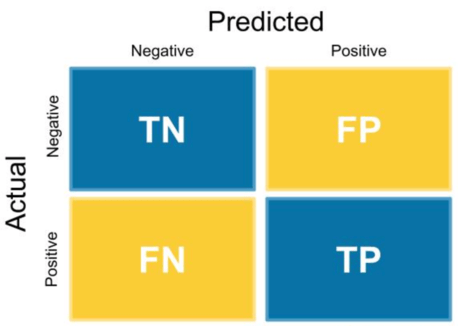

`cm` is a 2x2 matrix that represents the performance of your binary classification model. Each entry in this matrix corresponds to the count of different types of predictions made by your model.

Let's understand each entry:

- 53892: The number of True Negatives (TN). These are the instances that were actually 'non-5' images and were correctly predicted by your model as 'non-5'.

- 687: The number of False Positives (FP). These are the instances that were actually 'non-5' but were incorrectly predicted by your model as '5'.

- 1891: The number of False Negatives (FN). These are the instances that were actually '5' but were wrongly predicted by your model as 'non-5'.

- 3530: The number of True Positives (TP). These are the instances that were actually '5' and were correctly predicted by your model as '5' as well.

By looking at this matrix, your model seems to be doing a quite good job at classifying images, given that TP and TN are high, and FP and FN are comparatively lower. However, there's still room for improvement, as evident from the non-zero values of FP and FN.



---

## **Precision**



### Code Explanation

This code is used to calculate the precision score for classification predictions. The calculation is achieved using the `precision_score` function from the `sklearn.metrics` module.

The Precision score, also known as the positive predictive value, is a key machine learning metric. It measures the model's ability to correctly identify only relevant instances (true positives). The precision score is calculated as the number of true positives divided by the total number of true positives and false positives.

In the code, the function `precision_score` is used to calculate the precision of the classifier. The function takes in two arguments:

1. `y_train_5`: The first argument `y_train_5` is the true binary labels in binary label indicators.
2. `y_train_pred`: The second argument `y_train_pred` is the estimated targets as returned by a classifier.

In the comment, the precision score calculation is outlined manually: Precision is equal to True Positives (3530) divided by the sum of True Positives (3530) and False Positives (687). This manual calculation should match that from `precision_score(y_train_5, y_train_pred)`, given that the values in `y_train_5` and `y_train_pred` accurately reflect true positives and false positives.

\begin{align}
        precision = \frac{TP \,}{TP + FP}
    \end{align}

### Code

In [ ]:
# Import necessary function from sklearn metrics module
from sklearn.metrics import precision_score, recall_score

# Calculate Precision score using y_train_5 as true binary labels and y_train_pred as the estimated targets.
# The commented fraction equivalently represents the manual calculation of the precision score.
precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

### Additional Notes to Precision

Calculate the precision score manually using the confusion matrix from above `cm = confusion_matrix(y_train_5, y_train_pred)`

In [ ]:
print(cm)

[[ 3530   687]
 [ 1891 53892]]


Precision is equal to True Positives (3530) divided by the sum of True Positives (3530) and False Positives (687). This manual calculation should match that from `precision_score(y_train_5, y_train_pred)`, given that the values in `y_train_5` and `y_train_pred` accurately reflect true positives and false positives.



---

## **Recall**

### Code Explanation

This Python code snippet is being used to calculate the recall score of classification predictions. The recall score, or sensitivity, is calculated using the `recall_score` function from the `sklearn.metrics` package.

Recall is a key metric in machine learning, indicative of a model's ability to find all the positive samples. This measurement is particularly important in situations where False Negatives are much worse than False Positives. The recall score is calculated as the number of True Positives divided by the sum of True Positives and False Negatives.

In this code, the `recall_score` function is being called with two parameters:

1. `y_train_5`: This is the ground truth binary labels.
2. `y_train_pred`: These are the predicted targets as returned by a classifier.

The precision score is manually outlined in the comment: Recall is True Positives (3530) divided by the sum of True Positives (3530) and False Negatives (1891). This calculation should match the result of `recall_score(y_train_5, y_train_pred)` when the inputs accurately reflect true positives and false negatives.

\begin{align}
        recall = \frac{TP \,}{TP + FN}
    \end{align}

### Code

In [ ]:
# Calculate the recall score using y_train_5 as actual binary labels and y_train_pred as predicted targets.
# The fraction in the comment equivalates to the hand-written calculation of the recall score.
recall_score(y_train_5, y_train_pred)

0.6511713705958311

### Additional Notes to Recall

Calculate the precision score manually using the confusion matrix from above `cm = confusion_matrix(y_train_5, y_train_pred)`

In [ ]:
print(cm)

[[ 3530   687]
 [ 1891 53892]]


Recall is True Positives (3530) divided by the sum of True Positives (3530) and False Negatives (1891). This calculation should match the result of `recall_score(y_train_5, y_train_pred)` when the inputs accurately reflect true positives and false negatives.



---


## F1-Score

### Code Explanation

This code is used to calculate the F1 score of classification predictions. The F1 score means the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is insensitive to data imbalance.

The F1 score is calculated using the `f1_score` function from the `sklearn.metrics` module.

Code Explanation:

The function `f1_score` is called in this code with two arguments:

1. `y_train_5`: This is the ground truth binary labels.
2. `y_train_pred`: These are the estimated targets as returned by a classifier.

The F1 score corresponds to a situation where an equal weightage is given to recall and precision. It reaches its best value at 1 and worst at 0.

\begin{align}
        F1 = \frac{2 \,}{\frac{1 \,}{precision} + \frac{1 \,}{recall}} = 2* \frac{precision * recall\,}{precision + recall} = \frac{TP\,}{TP + \frac{FN + FP\,}{2}}
    \end{align}

### Code

In [ ]:
# Import the required function from sklearn metrics module
from sklearn.metrics import f1_score

# Use `f1_score` function to calculate F1 score, which uses `y_train_5` as actual binary labels and `y_train_pred` as estimated targets.
f1_score(y_train_5, y_train_pred)

0.7325171197343847

### Additional Notes to F1-Score

1. The F1 score is a measure of a test's accuracy that calculates the balance between precision (the measure of exactness or quality) and recall (the measure of completeness or quantity). It is most useful when you want similar precision and recall.

2. Context matters in choosing whether to prioritize precision or recall. For instance, for a kid-safe video classifier, having a high precision is crucial to ensure that all videos selected are safe. It would be acceptable to have a lower recall in this case, implying that the classifier might reject several good videos as long as the selected ones are safe. A human review might even be incorporated to verify the selection

3. Conversely, considering a shoplifter detection system, a high recall would be more critical. For such an application, even if the precision is as low as 30%, having a high recall (99%) would mean that almost all potential shoplifting activities would be flagged. A lower precision would lead to a few false alarms, but the high recall would ensure that most true cases are detected.

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and
vice versa. This is called the precision/recall trade-off.



---

## **ROC Curve**



### Code Explanation

1. `from sklearn.metrics import roc_curve` - This line is importing the `roc_curve` function from`sklearn.metrics` module.
2. `fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)` - Here, the `roc_curve` function is called with two arguments `y_train_5` which represent the true binary labels and `y_scores` which represent the target scores, that is array-like of shape (n_samples,) . All roc curve related values are stored in three output arrays `fpr` `fpr`, and `thresholds`
3. `idx_for_threshold_at_9) = (thresholds <= threshold_for_90_precision).argmax()` - This line of code is finding the index of maximum values in `threshold` array which less or equal to `threshold_for_90_precision` by combining conditional accessing technique of numpy and `argmax` function.
4. `tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]` - This line assigns the values of TPR and FPR at 90% threshold.

### Code

In [ ]:
"""
cross_val_predict function is used here from sklearn library for implementing cross validation
sgd_clf stands for Stochastic Gradient Descent Classifier, which an linear classifier used here for predictions.
X_train and y_train_5 are the training data and the associated labels respectively.
cv=3 represents the cross-validation splitting strategy, here, it is 3-fold cross-validation.
This function is configured to return the decision function score for each instance in the training set, as indicated by method="decision_function".
"""
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

print(y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [ ]:
# Importing the required function
from sklearn.metrics import roc_curve

# Using the roc_curve function to get FPR, TPR, and thresholds values
fpr, tpr, _ = roc_curve(y_train_5, y_scores)



---


### Code Explanation

The following code is generating a plot of the ROC curve derived from sklearn library in Python. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR). It also plots a dashed line indicating the performance of a randomly guessing classifier and highlights a specific point representing the threshold at 90% precision.

Code Explanation:
1. `plt.figure(figsize=(6, 5))` - The 'figure' function from 'plt' (matplotlib.pyplot) module is used to create a new figure with specified size (in inches).
2. `plt.plot(fpr, tpr, linewidth=2, label="ROC curve")` - This function is used to plot TPR against FPR with a line width of 2, and label the series as "ROC curve".
3. `plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")` - This function plots a straight line from (0,0) to (1,1) with a dashed line style to represent a random guessing classifier's ROC curve.
4. `plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")` - This function plots a black circle at the point that represents the FPR and TPR when the threshold is 90% precision.
5. The `plt.gca()` and the following lines of code are being used to add an arrow and a text to the graph indicating that increasing the threshold gives a higher precision.
6. Labels are set for the x-axis and y-axis, grid is made visible using `plt.grid()`, axis range is set with `plt.axis()`, a legend is shown with `plt.legend()`.
7. Finally, `plt.show()` will display all the plots that were created.

### Code

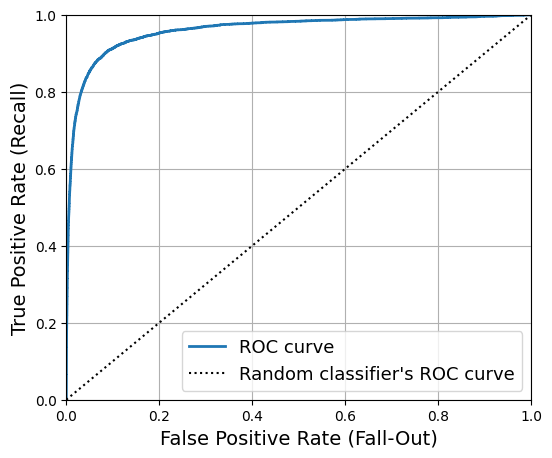

In [ ]:
# create a new figure with a custom size
plt.figure(figsize=(6, 5))

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")

# plot the line for random classifier ROC curve
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

# labeling and display settings
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

# display the plot
plt.show()



---


## AUC Score

### Code Explanation

One way to compare classifiers is to measure the area under the curve (AUC). A
perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier
will have a ROC AUC equal to 0.5.

1. `from sklearn.metrics import roc_auc_score` - This line is importing the `roc_auc_score` function from `sklearn.metrics` module.
2. `roc_auc_score(y_train_5, y_scores)` - Here, the 'roc_auc_score' function is called with the arguments `y_train_5` and `y_scores`. The `y_train_5` is the array of true binary labels and `y_scores` is the array-like target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions. The function returns the computed area under the ROC curve.



### Code

In [ ]:
# Importing the function from the relevant library
from sklearn.metrics import roc_auc_score

# Computing the AUC score using the function
auc_score = roc_auc_score(y_train_5, y_scores)

print(f'AUC Score: {auc_score}')

AUC Score: 0.9604938554008616






---


# **Multiclass Classification**

### Code Explanation

The following code is responsible for creating a multiclass classifier using the Stochastic Gradient Descent (SGD) approach. SGDClassifier supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme. For each of the **K** classes, a binary classifier is learned that discriminates between that and all other K - 1 classes.

1. A `SGDClassifier` is created. `SGDClassifier` is a linear classifier optimized by stochastic gradient descent and it's an efficient approach for this kind of large-scale machine learning problems. The 'random_state=42' is setting a seed for the random number generator in this SGD classifier to ensure reproducibility.

2. `fit` method is used to train the SGDClassifier on the training set i.e., `X_train` & `y_train`. X contain pixel intensities of the images in the MNIST data and y contain labels (0 to 9) for the corresponding images.

3. We then initialize the index of the image we want to predict in the variable `index_to_predict`.

4. We select the digit for which we want to predict a label by indexing the feature vector `X` with the `index_to_predict`. This selected digit is stored in variable `some_digit`.

5. The trained classifier `sgd_clf` then predicts a label for this selected image using the `predict` method. The `predict` method takes in a 2D array, so we provide our input in a list, hence [some_digit].

6 & 7. Lastly, it prints out the label predicted by the classifier and actual label of the image for comparison.

### Code

In [ ]:
# Importing SGD classifier for multiclass classification on mnist dataset
sgd_clf = SGDClassifier(random_state=42)  # initialising SGD classifier with a random seed (42) for random number generation

# fitting or training the classifier on the training dataset
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
index_to_predict = 6700 # index of the dataset for which prediction is to be made

# fetching the image from the MNIST dataset using the defined index
some_digit = X[index_to_predict]

# predicting a label for the fetched image using the trained classifier and storing the prediction
sgd_prediction = sgd_clf.predict([some_digit])

# printing out the prediction of the classifier
print(f'Prediction of the SGD Multiclass Classifier: {sgd_prediction}')

# printing out the actual label of the image to compare it with the predicted label
print(f'The actual label is: {y[index_to_predict]}')

Prediction of the SGD Multiclass Classifier: ['0']
The actual label is: 0




---


### Code Explanation


The next line of code uses the cross_val_score() function, a utility function from the Scikit-Learn library, to perform cross-validation on the training set. It evaluates the accuracy of the SGDClassifier() model by generating three different training and test datasets, then testing the model's accuracy on each.


1. `cross_val_score()` is a function that provides a simple way to perform K-Fold Cross-Validation, in which the data set is divided into 'k' groups or folds. After splitting, this function runs the model 'k' times and each time it will take one fold as a test set and remaining folds as a training set.

2. `sgd_clf` is the model which needs to be evaluated. It is the Stochastic Gradient Descent Classifier that we have trained in the previous code.

3. `X_train` and `y_train` are the input data and corresponding labels respectively.

4. `cv=3` is specifying that we want to divide our data into 3 folds for cross-validation.

5. `scoring="accuracy"` means the metric we are choosing to evaluate our model is accuracy. This will calculate the ratio of the number of correct predictions to the number of observations for each fold.

The result of this function will be an array that contains the accuracy for each fold of cross-validation.

**NOTE:** The following code excecution will take a while (5 mins)

### Code



---

# **Error Analysis**

### Code Explanation

The given code uses the function `cross_val_predict` from sklearn's model selection module to perform  cross-validation on the training set. It then displays the results in a confusion matrix. This kind of matrix is particularly useful to evaluate the performance of a classification model, as it shows the number of correct and incorrect predictions made by the model, broken down by each class, which in this case are the digits from 0 to 9.

1. First, the `cross_val_predict` function is called with the following parameters:
   - The first parameter is the `sgd_clf`, which is the classifier that was previously trained.
   - The second and third parameters, `X_train` and `y_train`, are the training dataset and the corresponding labels, respectively.
   - The fourth parameter is `cv=3`, specifying that three-fold cross-validation should be used, i.e., the training set is divided into three and then the model is trained and evaluated three times, each time evaluating on a different fold.
   - The function returns the prediction of each instance when it was in the test set (i.e., predictions made on data that classifier had not seen during training), and these predictions are stored in `y_train_pred`.
2. We then adjust the font size of the text in the generated confusion matrix using `plt.rc`.

3. ConfusionMatrixDisplay.from_predictions is then called with the parameters `y_train`, representing the actual labels, and `y_train_pred`, representing the predicted labels. The `from_predictions` method computes the confusion matrix and then displays it.

4. At the end, we use `plt.show()` to display the generated confusion matrix.

**NOTE:** The following code excecution will take a while (5 mins)

### Code

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Perform cross validation on the Stochastic Gradient Descent Classifier
# It returns the predictions that were obtained for each element in the test set
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=2)

plt.rc('font', size=9)  # Adjust the font size for the confusion matrix display

# Generate and display a confusion matrix from predictions
# Here y_train are the true values and y_train_pred are the predicted ones
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

plt.show()  # Show the confusion matrix

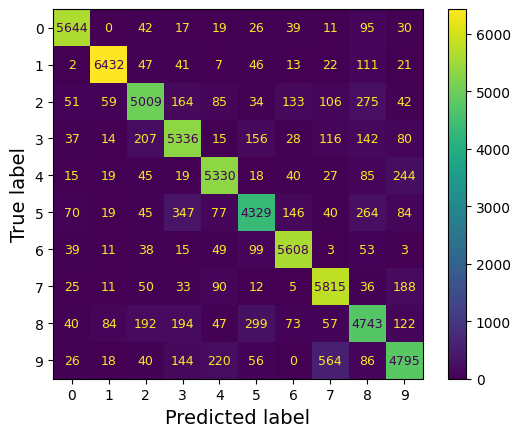

Why are somer cells darker than the other - because there were made more errors is the prediction.
It is important to normalize this confusion matrix, because it could be darker too, when we have less instances of an number in an dataset.



---


### Code Explanation

In the following code, normalization is done as it can help in better visualization and understanding of the matrix especially when class size varies.

In-depth Code Explanation:
1. `plt.rc('font', size=10)` is used to adjust the font size of the subsequent matplotlib plots.

2. `ConfusionMatrixDisplay.from_predictions` is a function from sklearn.metrics that computes the confusion matrix to evaluate the accuracy of the classification and plots it using matplotlib. The parameters passed to the function are:

   - `y_train`: the actual output labels.
   - `y_train_pred`: the predicted output labels.
   - `normalize`: by setting this to "true", each value in the confusion matrix is divided by the sum of that row. This results in a matrix where each row sums to 1. It can be helpful when the class size varies significantly as it would give a proportional representation.
   - `values_format`: it is set to ".0%" which formats all values in the matrix to percentages with no decimal places.

### Code

Normalizing is, when we divide each value by the total number of images in the corresponding class.
Now we can see, that 85% of the 5´s are correctly classified. 3% of the 5´s are missclassifier as 8´s.
When you look closely you see, that many digits are missclassified as 8´s.

In [ ]:
# setting the default font size of matplotlib to be 10
plt.rc('font', size=10)

# generating and displaying a normalized confusion matrix from the predicted and actual labels
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")

# rendering/displaying the plotted confusion matrix
plt.show()

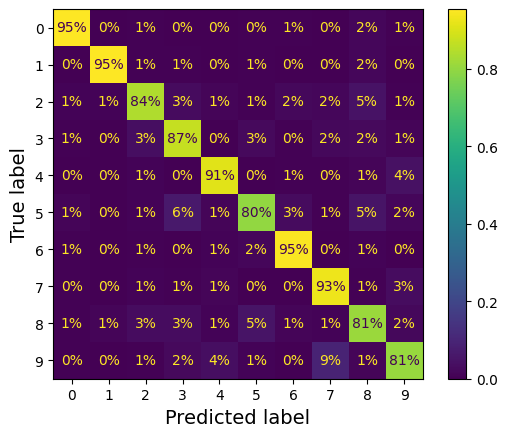



---


### Code Explanation

The following code visualizes the errors made by a Stochastic Gradient Descent (sgd) classifier in predicting digit recognition. It plots a sample of instances where the model predictions (y_pred) did not match the actual labels (y). These instances are labeled as errors. These error instances and their corresponding predicted and actual labels are extracted from input sample set (X). The Stochastic Gradient Descent (sgd) classifier is assumed to be a pre-trained model.

Detailed explanation:

1. `y_pred = sgd_clf.predict(X)`: The sgd_clf is used to predict the output based on input X. The output is stored in y_pred.
   
2. `errors = (y_pred != y)`: Here we check where predicted y values are not equal to the actual y values. This gives us a Boolean array, marking each instance where there's a mismatch as True and otherwise as False.

3. `X_errors = X[errors]`, `y_pred_errors = y_pred[errors]`, `y_real_errors = y[errors]`: We use this Boolean array to filter out the instances and their corresponding predicted and actual labels where the predictions were incorrect.

4. `n = 10`, `samples = np.random.choice(X_errors.shape[0], n)`: We then select a random sample of 10 error instances for visualization.

5. `fig = plt.figure(figsize=(10,10))`: We prepare a 10x10 figure for plotting our samples.

6. We then use a loop to individually plot each of these 10 errors, with their predicted and actual labels, in grayscale.

7. `plt.tight_layout()`,`plt.subplots_adjust(hspace = 0.5)`: These are used to adjust the spacing between the subplots for better viewability.

8. `plt.show()`: Finally, we display the plot.

### Code

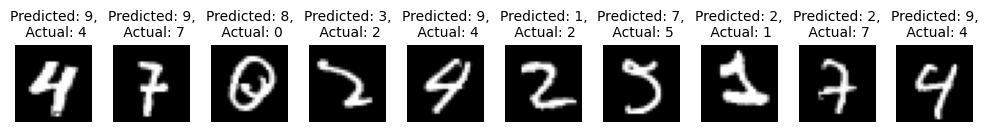

In [ ]:
# Use the SGD classifier to make predictions
y_pred = sgd_clf.predict(X)

# Compare the predictions to the actual labels to locate errors
errors = (y_pred != y)

# Extract the instances where there were errors
X_errors = X[errors]

# Extract the predictions where there were errors
y_pred_errors = y_pred[errors]

# Extract the actual labels where there were errors
y_real_errors = y[errors]

# Select a random sample of 10 errors for visualization
n = 10
samples = np.random.choice(X_errors.shape[0], n)

# Prepare a 10x10 figure for plotting samples
fig = plt.figure(figsize=(10,10))

# Individually plot each error instance in grayscale, with its predicted and actual labels
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(X_errors[samples[i]].reshape(28, 28), cmap="gray")
    plt.title(f"Predicted: {y_pred_errors[samples[i]]},\n Actual: {y_real_errors[samples[i]]}", fontsize=10)
    plt.axis('off')

# Adjust the spacing between the subplots for better visibility
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)

# Display the plot
plt.show()